In [1]:
## Regression and Clustering Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the CSV file
data = pd.read_excel("E://Data Analytics Projects//Grocery Bill Analysis//data//Regression and Cluster Scaled Data.xlsx")

# Display the first few rows to verify
data


,Product Key,Store Key,Store Name,Dollar Sales,Units Sold,Normalize/Standardize Data - Dollars,Normalize/Standardize Data - Units
0,P101,1.0,Zehrs,36.010000,9.000000,0.845207,1.257864
1,P101,3.0,FreshCo,41.350000,10.000000,1.187005,1.560345
2,P101,2.0,Costco,31.010000,9.000000,0.525171,1.257864
3,P101,3.0,FreshCo,22.470000,6.000000,-0.021450,0.350421
4,P101,2.0,Costco,29.330000,4.000000,0.417639,-0.254541
...,...,...,...,...,...,...,...
527,P142,1.0,Zehrs,0.000000,0.000000,-1.459690,-1.464464
528,P126,3.0,FreshCo,46.490000,7.000000,1.516002,0.652902
529,P126,3.0,FreshCo,41.730000,3.000000,1.211328,-0.557021
530,Mean,NaN,NaN,22.805113,4.841509,0.000000,0.000000


C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


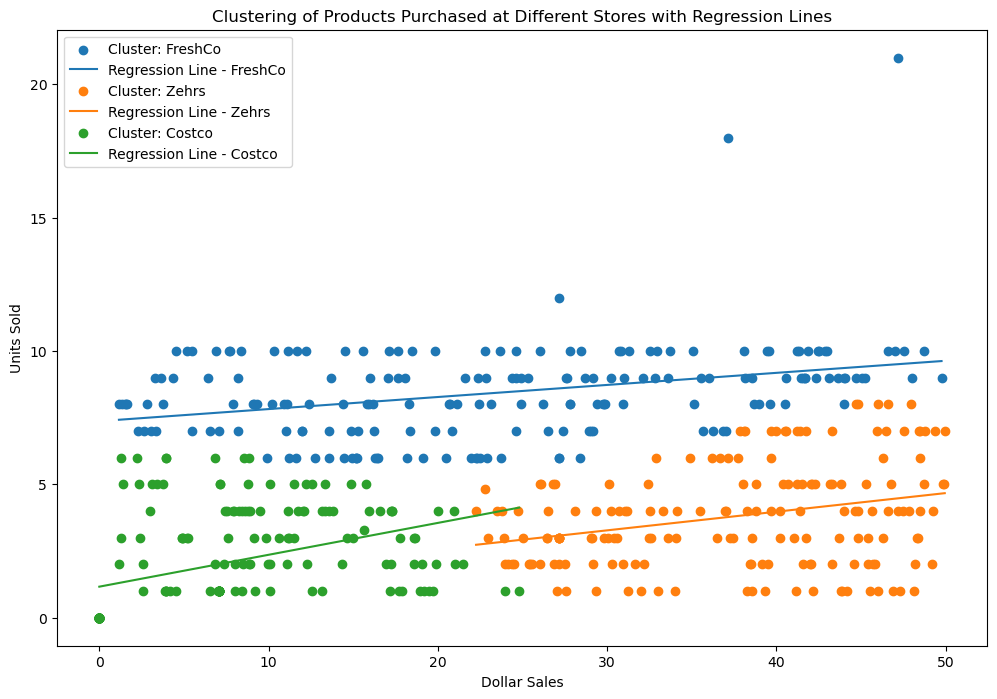

In [3]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Columns expected: 'Dollar Sales', 'Units Sold', 'Store Name'

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Dollar Sales', 'Units Sold']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify number of clusters and random state for reproducibility
clusters = kmeans.fit_predict(scaled_data)

# Add cluster information to the original DataFrame
data['cluster'] = clusters

# Map cluster IDs to store names based on the mode of 'Store Name' in each cluster
cluster_to_store = {cluster: data[data['cluster'] == cluster]['Store Name'].mode()[0] for cluster in data['cluster'].unique()}

# Plotting the clusters with regression lines
plt.figure(figsize=(12, 8))

for cluster in data['cluster'].unique():
    # Filter data for the current cluster
    cluster_data = data[data['cluster'] == cluster]
    X_cluster = cluster_data['Dollar Sales'].values.reshape(-1, 1)
    y_cluster = cluster_data['Units Sold'].values

    # Fit a regression line for the current cluster
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)

    # Generate predictions for plotting
    X_plot = np.linspace(X_cluster.min(), X_cluster.max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    # Scatter plot for cluster points
    plt.scatter(cluster_data['Dollar Sales'], cluster_data['Units Sold'], label=f'Cluster: {cluster_to_store[cluster]}')
    # Regression line for the cluster
    plt.plot(X_plot, y_plot, label=f'Regression Line - {cluster_to_store[cluster]}')

# Add plot labels, title, and legend
plt.xlabel('Dollar Sales')
plt.ylabel('Units Sold')
plt.title('Clustering of Products Purchased at Different Stores with Regression Lines')
plt.legend()
plt.show()


In [4]:
# Correlation Analysis
# Relationship Between Dollar Sales and Units Sold

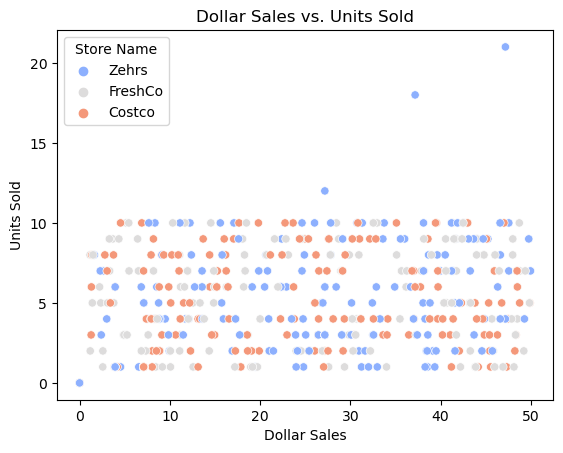

In [5]:
# Scatter plot of Dollar Sales vs. Units Sold
sns.scatterplot(x='Dollar Sales', y='Units Sold', hue='Store Name', data=data, palette="coolwarm")
plt.title("Dollar Sales vs. Units Sold")
plt.xlabel("Dollar Sales")
plt.ylabel("Units Sold")
plt.legend(title="Store Name")
plt.show()
